### CA Introduction

Emails are one of the most widely used forms of communication, both across businesses and individuals, which makes them attractive targets for unsolicited and malicious spam messages (Caldwell, 2024). This increase in spam can introduce security risks for both companies and individuals. Given this, possessing an effective spam detection system is crucial to mitigate the risks associated with spam (Ahmed et al., 2022).

This analysis will focus on the ***Spambase dataset***, created by Hewlett-Packard Labs, which classifies email observations as spam or non-spam based on various text and structural features. This report will be divided into five main sections:

#### 1. ***Data Characterization***
   - An initial analysis of the structure and size of the dataset will be conducted, assessing the existence of missing values and data types of the features/variables in the dataset (Medium, 2024).
   - This section will focus on understanding the scope and nature of the data, providing context for the analysis.

#### 2. ***Data Preparation and Exploratory Data Analysis (EDA)***
   - After data characterization, the dataset will be cleaned and any missing data points addressed.
   - Data visualizations will be created to illustrate statistical relationships between variables, examining the distributions of various features, their correlations, and other patterns within the dataset (Cardoso Pereiraa et al., 2024)
   - The goal of this step is to understand the context of the data and explore any present patterns or variances (Lim, 2024).

#### 3. ***Dimensionality Reduction using Principal Component Analysis (PCA)***
   - PCA will be applied to reduce the dataset's dimensionality, with a focus on retaining 99.5% of the variance while minimizing the number of features.
   - The dataset will be split into independent and dependent variables to analyze the variance within the independent variables (Kurita, 2020).
   - Following this methodology, "new" features will be created to retain 99.5% of the original variance that was spread among all variables.

#### 4. ***Curse of Dimensionality***
   - An explanation of the "Curse of Dimensionality" will be provided, with a discussion of how it could potentially impact this analysis.

# 1. Data Characterization

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns 

In [4]:
spam_df = pd.read_csv("spambase.csv")

***a) Firstly, I will explore the dataset. I will look at its head and tail***

In [6]:
spam_df.head()

,Unnamed: 0,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,True
1,1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,True
2,2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,True
3,3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,True
4,4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,True


In [7]:
spam_df.tail()

,Unnamed: 0,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
4596,4596,0.31,0.0,0.62,0.0,0,0.31,0.0,0.0,0.0,...,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,False
4597,4597,0.00,0.0,0.00,0.0,0,0.00,0.0,0.0,0.0,...,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,False
4598,4598,0.30,0.0,0.30,0.0,0,0.00,0.0,0.0,0.0,...,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,False
4599,4599,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,...,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,False
4600,4600,0.00,0.0,0.65,0.0,0,0.00,0.0,0.0,0.0,...,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,False


***b) Now, I will explore the size of the dataset and the data types of its features***

In [9]:
spam_df.shape

(4601, 59)

In [10]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 59 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  4601 non-null   int64  
 1   word_freq_make              4601 non-null   float64
 2   word_freq_address           4601 non-null   float64
 3   word_freq_all               4595 non-null   float64
 4   word_freq_3d                4599 non-null   float64
 5   word_freq_our               4601 non-null   object 
 6   word_freq_over              4600 non-null   float64
 7   word_freq_remove            4601 non-null   float64
 8   word_freq_internet          4586 non-null   float64
 9   word_freq_order             4601 non-null   float64
 10  word_freq_mail              4601 non-null   float64
 11  word_freq_receive           4601 non-null   float64
 12  word_freq_will              4601 non-null   float64
 13  word_freq_people            4601 

I can see that the **Spambase dataset** has **4,601 email observations** and **59 variables**. Out of those 59 variables:

- **48 variables** analyze the **word frequency** and **6 features** analyze the **character frequency**. 
   - Frequency is defined as the percentage of times a word or a character appears in the email text, meaning that these variables from **1 to 54** are **quantitative features**—specifically, they are **numerical** and **continuous variables** (since they are percentages).

- Similarly, columns **55–57** are also quantitative variables that are numerical:
   - Column **55** is a **continuous** variable.
   - Columns **56 and 57** are **discrete variables** (whole numbers indicated by `INT64` data type).

- Conversely, variable **58 ("is_spam")** is the only **qualitative, nominal attribute**, serving as the dataset’s **dependent variable** for classification.

- Also, after having analyzed the data types, it seems like ***4 variables will have to be cleaned in the EDA phase***, since instead of being float64 values, they appear as object (categorical values).

In summary, this is a **large dataset** with **more than 4,000 observations** and nearly **60 features**, containing both **quantitative** and **qualitative attributes**.

***c) Now, I will explore statistical values of the data***

In [13]:
spam_df.describe()

,Unnamed: 0,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,4601.000000,4601.000000,4601.000000,4595.000000,4599.000000,4600.000000,4601.000000,4586.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,2300.000000,0.104553,0.213015,0.281023,0.065453,0.095922,0.114208,0.105639,0.090067,0.239413,...,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285
std,1328.338624,0.305358,1.290575,0.504370,1.395454,0.273850,0.391441,0.401682,0.278616,0.644755,...,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,1150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000
50%,2300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000
75%,3450.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000
max,4600.000000,4.540000,14.280000,5.100000,42.810000,5.880000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


Given that the mean and the median have the same value of 2300, we know that the Spam dataset follows a normal distribution. Given this spread of the data, specific techniques will be used later on.

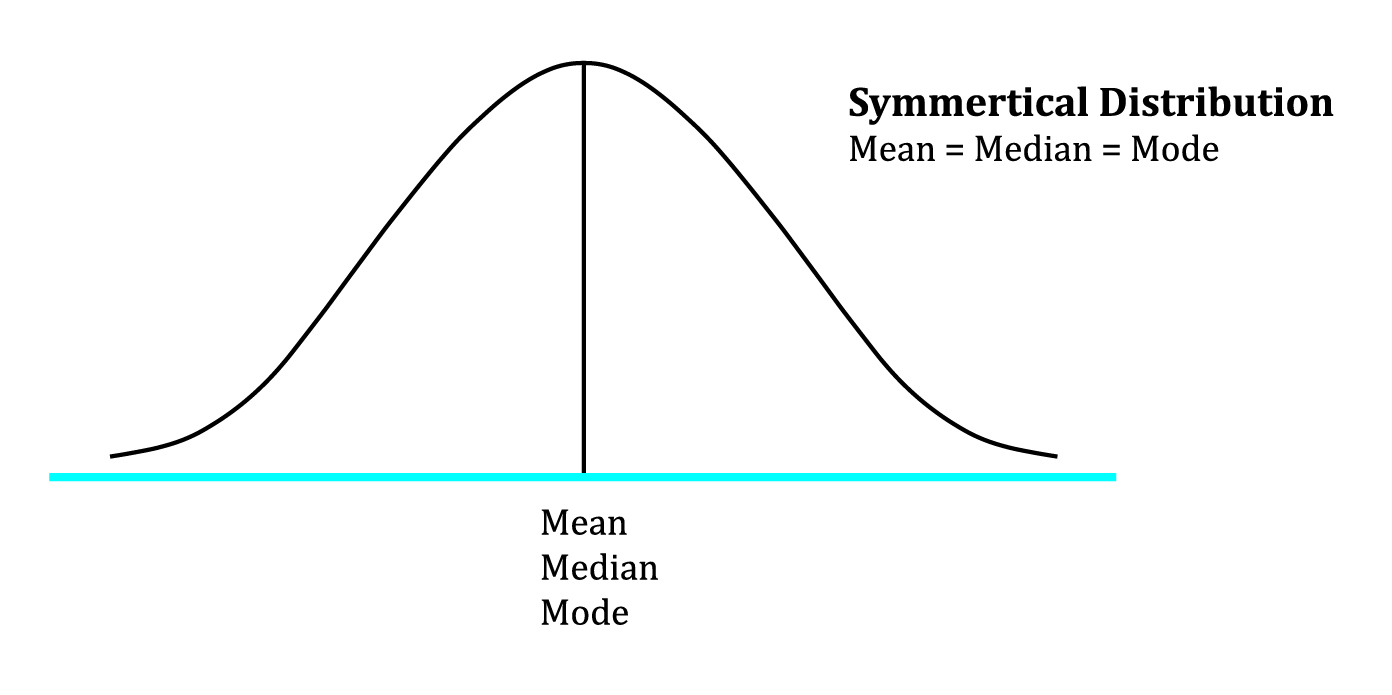

***d) Checking for missing values and duplicates***

In [17]:
spam_df.isnull().sum()

Unnamed: 0                      0
word_freq_make                  0
word_freq_address               0
word_freq_all                   6
word_freq_3d                    2
word_freq_our                   0
word_freq_over                  1
word_freq_remove                0
word_freq_internet             15
word_freq_order                 0
word_freq_mail                  0
word_freq_receive               0
word_freq_will                  0
word_freq_people                0
word_freq_report                0
word_freq_addresses             9
word_freq_free                  0
word_freq_business              0
word_freq_email                 0
word_freq_you                   0
word_freq_credit                0
word_freq_your                  0
word_freq_font                  0
word_freq_000                   0
word_freq_money                 0
word_freq_hp                    0
word_freq_hpl                   0
word_freq_george                0
word_freq_650                   0
word_freq_lab 

In [18]:
spam_df.duplicated().sum()

0

With both spam_df.isnull().sum() and spam_df.info() functions we can see that this dataset has missing values in ***10 variables***: __word_freq_all, word_freq_3d, word_freq_over, word_freq_internet, word_freq_addresses, word_freq_labs, word_freq_direct, word_freq_cs, word_freq_meeting and word_freq_table_

Additionally, there are ***no duplicate values***.

In summary, the dataset comprises **4,601 rows** and **59 columns**, with all independent variables being numerical and the dependent variable being categorical. While analyzing the dataset, the `spam_df.describe()` function has shown us that the mean and median of the numerical features are both **2,300**, indicating a balanced distribution around this central value (normal distribution). However, the dataset contains missing values in **10 variables** related to word frequency, specifically in features like `word_freq_all`, `word_freq_3d`, and `word_freq_internet`, among others. Additionally, there are no duplicated values, suggesting that each observation is unique.

# 2. Data Preparation and Exploratory Data Analysis (EDA)

***a) Firstly, I will handle the missing values***

I will focus on those 10 variables that have missing values 

In [24]:
spam_df["word_freq_all"].unique()

array([0.64, 0.5 , 0.71, 0.  , 0.46, 0.77, 0.25, 0.34, 1.42, 0.42, 0.55,
       0.1 , 3.03, 2.56, 0.48, 1.66, 1.05, 0.18, 0.99, 0.26, 1.09, 0.73,
       1.26, 0.45, 1.68, 0.47, 0.12, 0.66, 0.61, 0.53, 0.89, 0.94, 1.77,
       0.37, 0.2 , 0.23, 0.72, 1.28, 0.38, 1.12, 0.29, 0.7 , 0.43, 1.24,
       0.76, 0.63, 1.02, 0.4 , 0.8 , 0.67, 0.41, 0.39, 0.33, 1.38, 0.27,
       0.56, 0.62, 0.68, 0.35, 2.38, 0.08, 1.  , 0.54, 1.32, 0.87, 1.08,
       1.07, 1.31, 0.22, 0.15, 0.52, 0.32, 0.16, 1.1 , 0.65, 1.43, 0.81,
       0.69, 0.58, 0.57, 0.14, 0.6 , 0.85, 1.63, 0.86, 0.17, 1.53, 1.29,
       0.19, 0.05, 1.45, 1.34, 1.35, 1.22, 0.31, 0.36, 1.33, 0.93, 0.59,
       0.11, 1.16, 0.03, 0.51, 0.49, 1.56, 1.11, 0.91, 1.44, 0.88, 1.92,
       0.09, 0.24, 1.25, 0.3 , 1.18, 0.28, 1.81, 0.84, 0.78, 0.75, 0.13,
       1.01, 0.9 , 1.47, 0.44, 0.98, 1.72, 1.23, 1.7 , 2.22, 1.65, 1.64,
       0.74, 0.95, 0.82, 0.97, 1.5 , 1.51, 1.17, 0.92, 1.13, 2.99, 0.04,
       1.62, 1.58, 1.9 , 1.83, 1.85, 1.61, 1.4 , 1.

In [25]:
spam_df["word_freq_3d"].unique()

array([0.000e+00, 5.200e-01, 1.600e-01, 1.900e-01, 4.200e-01, 9.500e-01,
       1.700e-01, 5.030e+00, 7.180e+00, 1.363e+01, 8.100e-01, 1.160e+00,
       1.260e+00, 1.000e-01, 4.900e-01, 1.910e+00, 4.013e+01, 9.100e-01,
       9.160e+00, 4.310e+00, 4.281e+01, 1.916e+01, 6.000e-02, 3.546e+01,
       4.273e+01, 5.800e-01, 4.400e-01, 7.070e+00, 1.330e+00, 1.290e+00,
       2.100e-01, 1.973e+01, 5.700e-01, 6.000e-01, 4.000e-02, 1.350e+00,
       1.100e-01, 1.400e-01, 1.500e-01, 8.700e-01, 1.300e-01, 5.500e-01,
             nan, 3.100e-01])

In [26]:
spam_df["word_freq_over"].unique()

array([0.  , 0.28, 0.19, 0.32, 0.25, 0.35, 0.31, 0.05, 0.27, 0.92, 0.36,
       0.99, 0.12, 0.33, 0.73, 1.26,  nan, 0.46, 0.2 , 1.28, 0.76, 0.13,
       0.03, 0.6 , 0.64, 0.79, 0.16, 0.41, 0.4 , 0.66, 0.81, 0.39, 0.45,
       0.85, 0.29, 0.08, 0.78, 0.43, 0.87, 0.53, 0.56, 0.22, 0.42, 0.62,
       0.65, 0.54, 0.55, 1.12, 2.3 , 0.57, 0.1 , 0.17, 0.94, 0.7 , 0.18,
       0.34, 0.93, 0.51, 0.74, 0.44, 1.02, 0.48, 0.68, 0.11, 1.2 , 0.09,
       0.47, 0.61, 2.1 , 0.3 , 1.05, 1.29, 1.01, 0.84, 0.38, 0.98, 0.86,
       1.88, 1.32, 0.8 , 1.27, 1.1 , 0.23, 0.24, 0.15, 0.95, 0.63, 0.58,
       0.71, 0.37, 0.21, 0.67, 0.72, 1.14, 0.04, 0.5 , 0.14, 0.69, 0.91,
       0.9 , 0.59, 1.47, 1.61, 0.52, 1.25, 1.09, 1.86, 2.54, 0.77, 0.26,
       0.49, 1.49, 1.36, 1.4 , 1.21, 1.64, 1.04, 1.06, 1.11, 0.96, 2.43,
       0.06, 2.94, 0.75, 0.01, 0.07, 1.34, 0.02, 0.82, 1.19, 1.  , 1.07,
       2.63, 1.03, 5.88, 1.63, 3.44, 1.17, 0.89, 3.57, 1.57, 1.42])

In [27]:
spam_df["word_freq_internet"].unique()

array([0.000e+00, 7.000e-02, 1.200e-01, 6.300e-01, 1.850e+00, 1.880e+00,
       3.500e-01,       nan, 2.000e-02, 2.450e+00, 5.200e-01, 1.810e+00,
       6.000e-02, 2.800e-01, 3.300e-01, 1.090e+00, 1.100e+00, 9.300e-01,
       3.600e-01, 1.260e+00, 2.500e-01, 1.450e+00, 1.860e+00, 2.600e-01,
       1.400e-01, 4.600e-01, 5.000e-01, 5.000e-02, 1.280e+00, 1.900e-01,
       8.400e-01, 1.200e+00, 4.000e-01, 2.980e+00, 1.310e+00, 2.900e-01,
       4.200e-01, 2.340e+00, 2.040e+00, 1.120e+00, 4.500e-01, 4.400e-01,
       1.700e-01, 1.300e-01, 3.200e-01, 5.900e-01, 4.300e-01, 2.240e+00,
       7.100e-01, 2.700e-01, 6.000e-01, 6.200e-01, 8.900e-01, 2.300e-01,
       1.050e+00, 6.400e-01, 1.800e-01, 1.410e+00, 3.400e-01, 3.700e-01,
       6.700e-01, 1.290e+00, 9.100e-01, 8.000e-02, 2.020e+00, 1.100e-01,
       5.800e-01, 1.360e+00, 2.100e-01, 1.070e+00, 4.800e-01, 2.530e+00,
       1.080e+00, 4.700e-01, 5.300e-01, 4.900e-01, 3.330e+00, 2.960e+00,
       2.820e+00, 4.620e+00, 2.000e-01, 1.000e-01, 

In [28]:
spam_df["word_freq_internet"].unique()

array([0.000e+00, 7.000e-02, 1.200e-01, 6.300e-01, 1.850e+00, 1.880e+00,
       3.500e-01,       nan, 2.000e-02, 2.450e+00, 5.200e-01, 1.810e+00,
       6.000e-02, 2.800e-01, 3.300e-01, 1.090e+00, 1.100e+00, 9.300e-01,
       3.600e-01, 1.260e+00, 2.500e-01, 1.450e+00, 1.860e+00, 2.600e-01,
       1.400e-01, 4.600e-01, 5.000e-01, 5.000e-02, 1.280e+00, 1.900e-01,
       8.400e-01, 1.200e+00, 4.000e-01, 2.980e+00, 1.310e+00, 2.900e-01,
       4.200e-01, 2.340e+00, 2.040e+00, 1.120e+00, 4.500e-01, 4.400e-01,
       1.700e-01, 1.300e-01, 3.200e-01, 5.900e-01, 4.300e-01, 2.240e+00,
       7.100e-01, 2.700e-01, 6.000e-01, 6.200e-01, 8.900e-01, 2.300e-01,
       1.050e+00, 6.400e-01, 1.800e-01, 1.410e+00, 3.400e-01, 3.700e-01,
       6.700e-01, 1.290e+00, 9.100e-01, 8.000e-02, 2.020e+00, 1.100e-01,
       5.800e-01, 1.360e+00, 2.100e-01, 1.070e+00, 4.800e-01, 2.530e+00,
       1.080e+00, 4.700e-01, 5.300e-01, 4.900e-01, 3.330e+00, 2.960e+00,
       2.820e+00, 4.620e+00, 2.000e-01, 1.000e-01, 

In [29]:
spam_df["word_freq_addresses"].unique()

array([0.  , 0.14, 1.75, 0.12, 0.18, 1.27,  nan, 0.3 , 0.26, 0.03, 2.31,
       0.05, 0.16, 0.34, 0.15, 0.17, 0.51, 0.45, 1.11, 0.62, 0.46, 0.07,
       0.19, 2.22, 1.69, 2.38, 2.09, 0.35, 2.21, 0.76, 0.39, 1.92, 1.93,
       0.04, 2.12, 0.06, 1.88, 0.66, 0.24, 0.13, 0.79, 2.16, 1.61, 0.09,
       0.31, 0.02, 0.25, 0.63, 1.46, 0.32, 1.42, 2.06, 1.  , 0.89, 1.47,
       0.75, 0.5 , 0.69, 0.2 , 1.57, 0.23, 0.47, 2.11, 2.05, 1.17, 1.5 ,
       1.51, 1.66, 0.37, 0.65, 1.07, 0.22, 1.1 , 1.81, 1.15, 1.14, 0.42,
       0.4 , 0.97, 1.04, 0.54, 0.53, 0.6 , 1.6 , 0.29, 0.55, 0.78, 0.77,
       1.02, 0.1 , 0.61, 0.28, 1.58, 0.86, 0.84, 0.41, 0.58, 0.59, 0.27,
       1.94, 4.41, 0.33, 0.68, 0.83, 0.71, 0.81, 2.86, 1.44, 1.7 , 0.08,
       1.36, 1.28, 0.01, 1.4 , 1.49, 1.16, 1.19, 2.24, 0.44])

In [30]:
spam_df["word_freq_direct"].unique()

array([0.  , 0.06, 0.96, 0.42, 1.59, 0.12, 0.48, 0.46, 0.16, 0.19, 0.14,
       0.15, 0.66, 0.91, 0.65, 0.44, 0.02, 0.08, 0.92, 1.07, 0.17, 0.1 ,
       0.36, 0.59, 0.11, 0.29, 0.68, 0.5 , 0.35, 0.53, 0.47, 0.13, 0.93,
       0.09, 0.97, 0.28, 0.03, 2.22, 0.63, 0.2 , 0.07, 0.34, 0.89, 0.64,
       0.31, 0.52, 0.51, 0.04, 0.74, 0.37, 1.19, 0.24, 0.49, 0.4 , 0.26,
       1.62, 0.27, 1.36, 0.32, 0.38, 0.33, 0.25, 1.  , 0.58, 0.61, 0.43,
       0.45, 0.55, 0.22, 2.04, 0.05, 2.11, 4.54, 0.76, 0.23, 0.39, 1.11,
       3.57, 1.31, 0.54, 1.85, 0.6 , 0.72, 0.73, 0.99, 0.21, 1.08, 1.38,
       4.16, 2.27, 0.87, 0.82, 1.28, 0.75, 1.58, 4.76, 2.77, 1.42, 1.01,
       4.34, 0.86, 0.62, 3.12, 1.56, 2.63, 1.72, 0.8 , 0.01, 0.56, 0.78,
       3.03, 2.12, 2.56, 1.17, 3.84, 1.2 , 2.  , 4.  , 0.9 , 0.85, 2.32,
       0.88, 1.44, 0.77, 0.67,  nan])

In [31]:
spam_df["word_freq_cs"].unique()

array([0.  , 0.1 , 2.32, 0.54, 0.39, 7.14, 3.22, 0.51, 1.16, 0.13, 0.89,
       0.25, 0.76, 0.34, 1.38, 0.33, 0.08, 3.25, 0.59, 1.24, 0.18, 0.17,
       1.3 , 3.26, 0.31, 0.19, 0.65, 1.56, 3.12, 1.44, 1.62, 0.68, 4.75,
       1.29, 0.06, 2.31, 0.36, 0.04, 1.01, 0.26, 0.16, 2.  , 0.94, 1.4 ,
       0.29, 0.28, 0.71, 3.07, 0.03, 2.11, 0.2 , 0.61, 1.58, 0.35, 0.37,
       2.5 , 2.56, 0.56, 5.  , 0.46, 2.8 , 5.88, 2.22, 2.26, 1.7 , 1.35,
       1.92, 1.94, 1.72, 0.92, 0.8 ,  nan, 0.52, 1.26, 0.38, 0.98, 0.75,
       1.98, 0.32, 0.69, 0.07, 0.02, 0.93, 2.83, 1.69, 1.33, 0.84, 2.81,
       2.15, 0.86, 1.06, 0.81, 1.8 , 1.66, 1.28, 0.23, 0.62, 0.6 , 1.2 ,
       1.17, 0.44, 4.28, 2.69, 0.53, 1.88, 0.21, 1.02, 0.42, 4.76])

In [32]:
spam_df["word_freq_meeting"].unique() 

array([0.000e+00, 1.300e-01, 6.000e-02, 2.300e-01, 3.400e-01, 1.100e-01,
       1.800e-01, 3.000e-02, 2.500e-01,       nan, 4.500e-01, 3.200e-01,
       3.500e-01, 3.800e-01, 3.700e-01, 3.600e-01, 4.080e+00, 7.300e-01,
       9.000e-01, 3.700e+00, 1.850e+00, 2.890e+00, 1.600e+00, 1.200e-01,
       1.880e+00, 8.000e-02, 2.120e+00, 9.100e-01, 6.700e-01, 2.000e-02,
       1.900e+00, 9.600e-01, 7.000e-02, 1.750e+00, 1.810e+00, 9.090e+00,
       1.000e-02, 9.200e-01, 1.340e+00, 3.220e+00, 5.120e+00, 2.230e+00,
       6.000e-01, 9.700e-01, 1.620e+00, 5.400e-01, 2.430e+00, 1.020e+00,
       7.600e-01, 9.300e-01, 3.900e-01, 8.900e-01, 1.100e+00, 2.800e-01,
       4.000e-01, 4.540e+00, 5.000e+00, 3.840e+00, 1.050e+00, 5.300e-01,
       6.600e-01, 8.500e-01, 1.860e+00, 2.690e+00, 1.380e+00, 7.100e-01,
       1.040e+00, 7.140e+00, 2.220e+00, 1.440e+00, 2.020e+00, 5.800e-01,
       7.800e-01, 3.440e+00, 1.090e+00, 2.400e+00, 2.200e-01, 8.700e-01,
       6.060e+00, 4.800e-01, 4.000e-02, 5.700e-01, 

In [33]:
spam_df["word_freq_table"].unique() 

array([0.  , 0.04, 0.34, 0.46, 0.02, 0.03,  nan, 0.06, 0.09, 0.11, 0.37,
       0.16, 0.27, 1.02, 1.91, 0.65, 0.19, 0.18, 0.74, 0.86, 0.05, 0.28,
       0.25, 0.39, 0.01, 1.6 , 2.17, 0.12, 0.14, 0.93, 1.51, 0.88, 2.12,
       0.73, 0.61, 0.81, 0.72, 0.51, 0.8 ])

The nan values are the missing values

***b) Indentifying incorrect values***

In [36]:
spam_df["word_freq_hpl"].unique()

array(['0', '0.34', '0.05', '1.49', '0.21', '0.39', '0.1', '0.44', '0.51',
       '0.04', '0.57', '1.35', '0.26', '0.52', '0.09', '0.11', '1.46',
       '1.19', '0.97', '1.22', '0.36', '0.98', '1.77', '0.7', 'none',
       '1.36', '2.04', '3.93', '0.9', '0.58', '0.66', '5.4', '1.44',
       '0.13', '3.17', '2.68', '0.68', '0.33', '0.47', '1.8', '0.48',
       '0.54', '4.16', '3.57', '2.77', '1.96', '3.7', '0.74', '0.96',
       '0.25', '1.3', '1.6', '2.17', '2.58', '2.35', '2', '1.72', '2.3',
       '0.67', '1.38', '0.85', '2.57', '1.93', '1.66', '2.45', '1.07',
       '0.92', '4.54', '0.69', '0.79', '0.28', '7.69', '0.81', '0.87',
       '0.45', '1.39', '1.17', '1.05', '1.98', '1.16', '0.3', '0.43',
       '2.22', '0.41', '1.4', '1.33', '1.14', '4.05', '0.32', '1.11',
       '2.66', '1.2', '2.63', '1.7', '1.86', '1.02', '2.75', '2.8',
       '1.06', '0.59', '0.83', '0.08', '1.08', '3.84', '4.76', '0.15',
       '1.29', '2.54', '0.78', '1.85', '2.85', '3.92', '10.86', '1.81',
       '0

In [37]:
spam_df["word_freq_labs"].unique()

array([nan, '0.39', '0', '0.06', '0.66', '2.24', '0.24', '3.38', '0.97',
       '0.86', '0.62', '0.17', '0.11', '0.12', '0.1', '0.18', '2.04',
       '0.73', '0.58', '1.44', '0.26', '2.7', '3.57', '0.3', '2.77',
       '0.46', '1', '0.14', '2.17', '0.31', '0.32', '0.08', '1.06', '2',
       '0.89', '1.73', '0.42', '1.96', '0.48', '1.66', '0.52', '4.54',
       '0.54', '0.27', '0.9', '1.52', '1.02', '0.15', '0.55', '0.28',
       '1.33', '0.35', '1.11', '1.31', '0.44', '0.34', '0.93', '0.68',
       '0.25', '0.16', '0.07', '1.85', '0.82', '0.05', '1.81', '0.74',
       '0.91', '0.57', '0.51', '0.72', '0.5', '0.99', '0.96', '2.32',
       '0.21', '1.19', '1.08', '1.26', '1.38', '0.22', '0.09', '4.16',
       '1.17', '0.33', '0.63', '1.03', '1.23', '1.84', '0.2', '2.27',
       '0.87', '3.22', '0.61', '0.19', '0.45', '2.29', '0.53', '0.37',
       '1.28', '0.84', '0.75', '1.29', '0.38', '0.77', '1.58', '0.23',
       '4.76', '2.45', '0.7', '0.56', '2.19', '0.78', '0.92', '1.42',
       '1

In [38]:
spam_df["word_freq_000"].unique()

array(['0', '0.43', '1.16', '0.19', '0.35', '0.7', '0.31', '0.05', '0.48',
       '0.3', '0.84', '0.49', '1.05', '1.83', '0.12', '1.96', '0.46',
       '1.88', '0.44', '0.62', '0.72', '1.28', '0.59', '1.38', '0.6',
       '0.64', '0.79', '1.13', '0.15', '0.5', '0.61', '0.82', '0.38',
       '2.53', '1.66', '0.34', '0.78', '1.02', '0.23', '0.53', '0.56',
       '1.62', '1.61', '0.39', '1.6', '0.37', '0.89', '0.96', '0.13',
       '0.22', '1.12', '0.95', '0.08', '0.06', '0.8', '0.2', '1.58',
       '0.54', '0.18', '0.85', '0.11', '1', '0.25', '0.36', '0.63',
       '0.65', '0.45', '1.1', '1.78', '0.14', '0.51', '1.03', '0.76',
       '1.07', '1.39', '1.44', '1.08', '0.75', '0.4', '2.05', '2.1',
       '0.1', '0.47', '3.38', '1.42', '1.85', '1.59', '0.68', '1.41',
       '2.85', '2.95', '0.74', '0.28', '0.55', '1.82', '1.09', '1.18',
       '0.77', '2.2', '2.24', '1.36', '0.09', '1.47', '0.17', '0.66',
       '1.23', '2.59', '0.41', '0.42', '0.29', '0.86', '0.52', '0.91',
       '1.3', '0

In [39]:
spam_df["word_freq_our"].unique()

array(['0.32', '0.14', '1.23', '0.63', '1.85', '1.92', '1.88', '0.61',
       '0.19', '0', '0.38', '0.34', '0.9', '0.71', '1.27', '0.94', '1.11',
       '1.59', '0.76', '2.94', '1.16', '0.65', '1.89', '1.46', '0.48',
       '0.41', '0.52', '0.45', '1.57', '0.05', '0.42', '0.23', '1.39',
       '0.68', '1.32', '1.26', '0.53', '0.44', '0.46', '1.44', '0.18',
       '1.67', '1.28', '1.4', '1.15', '0.4', '2.24', '0.35', '0.43',
       '4.25', '0.95', '0.88', '0.51', '0.1', '2.23', '0.15', '0.92',
       '0.33', '1.51', '1.6', '0.56', '0.66', '1.49', '1.65', '0.29',
       '0.81', '2.25', '2.7', '0.62', '1.31', '1.36', '0.85', '0.27',
       '2.1', '0.3', '0.26', '0.5', '0.54', '0.89', '0.08', '0.87',
       '0.11', '6.25', '0.8', '2.19', '1.17', '0.55', '1.77', '2.5',
       '0.25', '0.96', '1.03', '0.39', '0.64', '0.69', '1.81', '1.09',
       '0.22', '0.31', '1.38', '0.99', '1.24', '2.33', '0.75', '1.14',
       '0.2', '0.78', '1.63', '1.29', '0.16', '0.58', '0.91', '0.17', '2',
       '

There are also incorrect values like ***"none", "???", "no"*** in 4 variables of the dataset, that I will define in the mfv DataFrame

In [41]:
mvf=["none","???","no"]

In [42]:
spam_df.isnull().sum()

Unnamed: 0                      0
word_freq_make                  0
word_freq_address               0
word_freq_all                   6
word_freq_3d                    2
word_freq_our                   0
word_freq_over                  1
word_freq_remove                0
word_freq_internet             15
word_freq_order                 0
word_freq_mail                  0
word_freq_receive               0
word_freq_will                  0
word_freq_people                0
word_freq_report                0
word_freq_addresses             9
word_freq_free                  0
word_freq_business              0
word_freq_email                 0
word_freq_you                   0
word_freq_credit                0
word_freq_your                  0
word_freq_font                  0
word_freq_000                   0
word_freq_money                 0
word_freq_hp                    0
word_freq_hpl                   0
word_freq_george                0
word_freq_650                   0
word_freq_lab 

In [43]:
spam_df = pd.read_csv("spambase.csv",na_values=mvf)

In [44]:
spam_df.isnull().sum()

Unnamed: 0                      0
word_freq_make                  0
word_freq_address               0
word_freq_all                   6
word_freq_3d                    2
word_freq_our                   1
word_freq_over                  1
word_freq_remove                0
word_freq_internet             15
word_freq_order                 0
word_freq_mail                  0
word_freq_receive               0
word_freq_will                  0
word_freq_people                0
word_freq_report                0
word_freq_addresses             9
word_freq_free                  0
word_freq_business              0
word_freq_email                 0
word_freq_you                   0
word_freq_credit                0
word_freq_your                  0
word_freq_font                  0
word_freq_000                   1
word_freq_money                 0
word_freq_hp                    0
word_freq_hpl                   1
word_freq_george                0
word_freq_650                   0
word_freq_lab 

*As we can see the number of null values has increased in variables word_freq_our, word_freq_000, word_freq_hpl and word_freq_labs*

**Method 1**: Given the context of this dataset, which indicates that this is a **large dataset**, I can **drop the null values**. Thus, by dropping the missing values, I would lose only 7% of the whole dataset.

In [47]:
test_spam_df=spam_df

In [48]:
test_spam_df=test_spam_df.dropna(axis=0)

In [49]:
test_spam_df.shape

(4273, 59)

In [50]:
test_spam_df.head()

,Unnamed: 0,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
250,250,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.000,0.000,0.000,2.500,21,130,True
251,251,0.00,0.00,0.00,0.0,0.00,2.30,0.00,0.00,0.00,...,0.0,0.829,0.000,2.766,0.829,0.000,5.607,25,157,True
252,252,0.08,0.16,0.32,0.0,1.38,0.16,0.08,0.00,0.24,...,0.0,0.085,0.061,0.390,0.097,0.012,5.594,119,1561,True
253,253,0.48,0.20,0.55,0.0,0.27,0.20,0.00,0.27,0.27,...,0.0,0.105,0.000,0.750,0.305,0.000,3.401,94,966,True
254,254,0.48,0.20,0.55,0.0,0.27,0.20,0.00,0.27,0.27,...,0.0,0.105,0.000,0.750,0.305,0.000,3.401,94,966,True


***Method 2***: filling null values with the median given the context of this dataset, which indicates that the dataset follows a ***normal distribution***.Thus, I can also replace missing values with the mean since replacing it by the mean and the median is almost equivalent in this case.

In [52]:
test_spam_df2=spam_df

In [53]:
test_spam_df2=test_spam_df2.fillna(test_spam_df2.mean())

In [54]:
test_spam_df2.shape

(4601, 59)

In [55]:
test_spam_df2.head()

,Unnamed: 0,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,True
1,1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,True
2,2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,True
3,3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,True
4,4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,True


***Later on, we should compare both methods to see which one is better for the Machine Learning model performance, given that, data science is a cyclical and not a linear process***

Data Visualization piece will be done within PCA, once Dimensionality of this dataset is reduced.

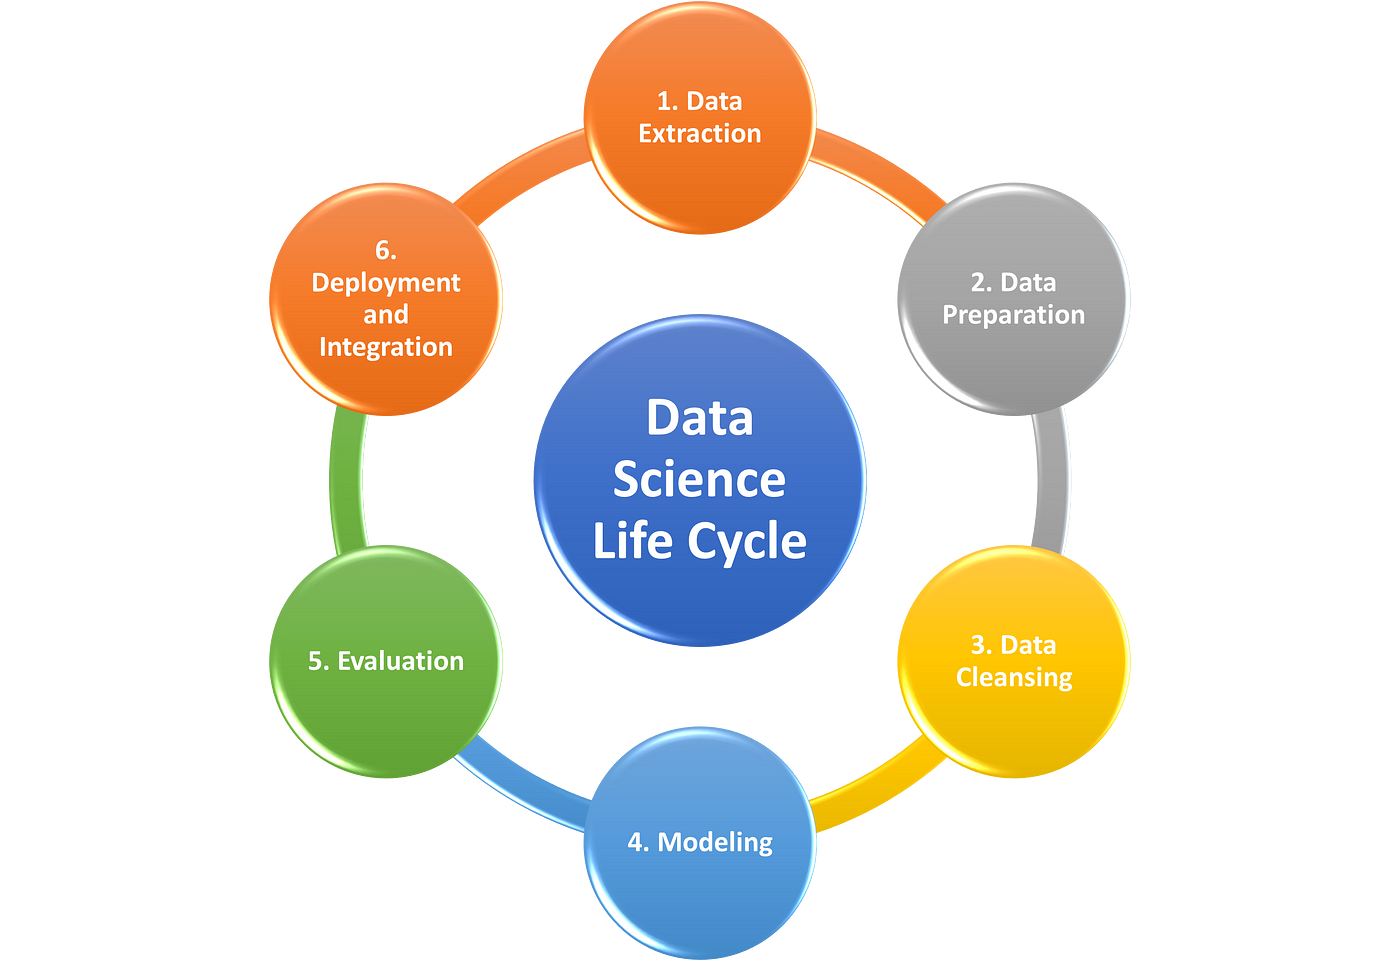

# 3. Dimensionality Reduction using Principal Component Analysis (PCA)

I will now perform PCA to reduce the dimensionality of this dataset, while retaining 99.5% of the variance with the optimal number of features. As we have seen so far, data values are not the most critical part of the analysis. The key milestone is to capture the signal within the dataset, that is, the pattern or the variance that is present among the independent variables.

In [61]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [62]:
spam_df["is_spam"].unique()

array([ True, False])

In [63]:
spam_no_label = test_spam_df2.drop(columns=['is_spam'])

In [64]:
spam_no_label.head()

,Unnamed: 0,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


Now, we have the dataset with ***only independent values***

In [66]:
spam_no_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  4601 non-null   int64  
 1   word_freq_make              4601 non-null   float64
 2   word_freq_address           4601 non-null   float64
 3   word_freq_all               4601 non-null   float64
 4   word_freq_3d                4601 non-null   float64
 5   word_freq_our               4601 non-null   float64
 6   word_freq_over              4601 non-null   float64
 7   word_freq_remove            4601 non-null   float64
 8   word_freq_internet          4601 non-null   float64
 9   word_freq_order             4601 non-null   float64
 10  word_freq_mail              4601 non-null   float64
 11  word_freq_receive           4601 non-null   float64
 12  word_freq_will              4601 non-null   float64
 13  word_freq_people            4601 

In [67]:
pca = PCA().fit(spam_no_label)

Text(0, 0.5, 'Cumulative explained variance')

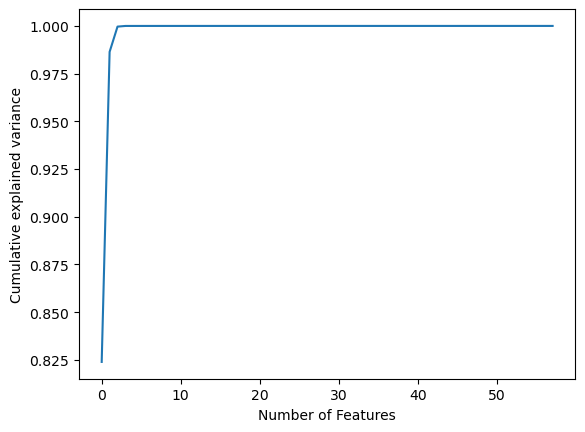

In [68]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Features")
plt.ylabel("Cumulative explained variance")

***The PCA shows that only 2 variables are needed to retain 99.5% of the variance***

In [70]:
pca = PCA(2)
projected=pca.fit_transform(spam_no_label)

In [71]:
projected.shape

(4601, 2)

In [72]:
spam_pca = pd.DataFrame(projected, columns = ["C1", "C2"])

In [73]:
spam_pca.head()

,C1,C2
0,-2279.984088,-302.618801
1,-2375.233542,438.138402
2,-2541.865749,1703.483679
3,-2265.349475,-390.690252
4,-2264.358001,-390.560338


In [74]:
spam_pca["is_spam"] = test_spam_df2["is_spam"] 

In [75]:
spam_pca.head()

,C1,C2,is_spam
0,-2279.984088,-302.618801,True
1,-2375.233542,438.138402,True
2,-2541.865749,1703.483679,True
3,-2265.349475,-390.690252,True
4,-2264.358001,-390.560338,True


In [76]:
spam_array = spam_pca.values

# 4. Curse of Dimensionality

The curse of dimensionality describes the challenges that we face when analyzing data with a ***large number of features or variables***, just like this spam dataset. As the number of features increases, the amount of data (observations) needed to accurately understand the signal or the pattern of the dataset grows exponentially as well. This makes it harder to find meaningful insights because the data becomes sparse, computations become more complex, and traditional methods may no longer work effectively. In simple words, having too many variables can make it difficult to make accurate predictions or draw reliable conclusions from the data we are dealing with.

The figure below illustrates the curse of dimensionality perefctly as it shows how as dimensions increase (from 2D in A to 3D in B), data becomes more sparse in the space. In larger dimensions, most of the volume is concentrated close to the edges of the space rather than close to the center, illustrating how it gets more difficult to capture meaningfull patterns and the signal of the data without a significantly higher amount of data. This then, complicates such tasks like clustering, classification, etc. 

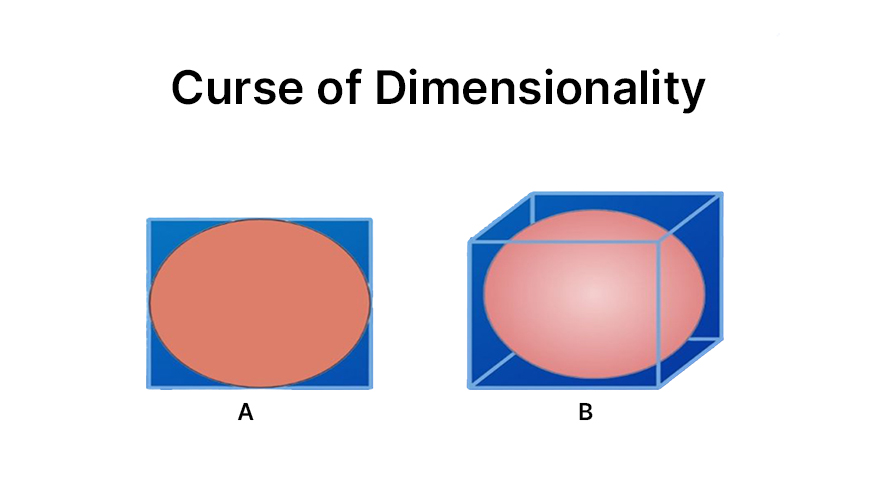

# 5. Summary

In this analysis of  the Spambase dataset, it is clear that the context of the data refers to classifying email observations as spam or non-spam based on various text and structural features. 

-During ***data characterization*** phase, I was able to classify numerous features into quantitative and qualitative variables, identifying the independent and dependent variables, as well as discrete vs continuous, and categorical features. Then, I was also able identify the shape of the dataset, exploring its size, data types and statistical distribution. 

-During ***data preparation and exploratory data analysis (EDA)***, I cleaned the dataset, eliminating incorrect values and handling missing values.

-During ***dimensionality reduction using Principal Component Analysis (PCA)***, I reduced the dimensionality of the dataset from 59 variables to 2 variables, retaining 99.5% of the variance to capture the signal of the dataset while minimizing the number of features. This way, I studied the optimal number of features.

Finally, I provided a definition of the "Curse of Dimensionality" concept as per my understanding.

# 6. References

Ahmed, N., Amin, R., Aldabbas, H., Koundal, D., Alouffi, B., & Shah, T. (2022). Machine Learning Techniques for Spam Detection in Email and IoT Platforms: Analysis and Research Challenges. Security and Communication Networks, 1-19.

Caldwell, H. (2024, January 22). Texaport. Retrieved from Texaport: https://texaport.co.uk/blog/the-impact-of-spam-emails-on-businesses

Cardoso Pereiraa, R., & al, e. (2024). Imputation of data Missing Not at Random: Artificial generation and benchmark analysis. Expert Systems with Applications.

Kurita, T. (2020). Principal Component Analysis (PCA). Springer.

Lim, L. (2024, May 14). Medium. Retrieved from Medium: https://medium.com/@liam.lim/data-analysis-project-1-exploratory-data-analysis-eda-with-python-3b0bd40332b1

Medium. (2024, September 19). Retrieved from Medium: https://medium.com/@libertihub/missing-values-and-distribution-analysis-practical-and-theoretical-guide-to-eda-with-python-12f83ec87586

